In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
dataset = pd.read_csv("datasets/Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Position Levels and salaries are not linearly related.

So, this is a problem of polynomial regression.

split feature and target variable

In [75]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

train test split

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Training Linear Regression model on whole dataset

y = b0 + b1*x1

x1 -> position levels

y -> salaries

In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

Training Polynomial Regression Model on whole dataset

y = b0 + b1*x1 + b2(x1^2)

y -> salaries

x1 -> position levels

In [78]:
'''
x1 -> levels
for polynomial regressio of degree 2, 
x1^2 needs to be inserted into the linear regression model.
Hence we transform the feature matrix accordingly.
'''
from sklearn.preprocessing import PolynomialFeatures
poly_reg2 = PolynomialFeatures(degree = 2)
X_poly = poly_reg2.fit_transform(X)

''' 
Now we train the Linear regression model with tranformed matrix of feature variables and output variable.
'''
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

Visualizing linear regression results

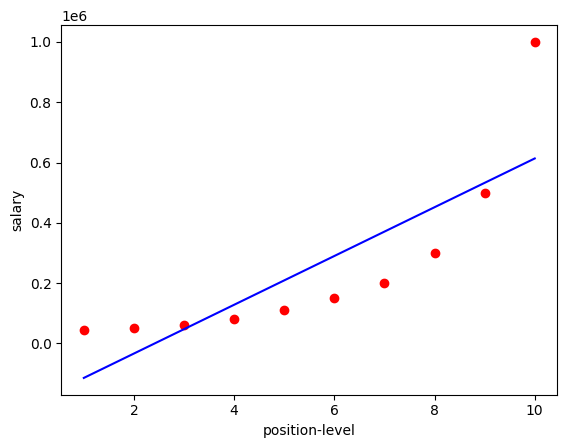

In [79]:
plt.scatter(X, y, color = 'r')
plt.plot(X, lr.predict(X), color = 'b')
plt.xlabel('position-level')
plt.ylabel('salary')
plt.show()

vizaulize results for polynomial regression (degree = 2)

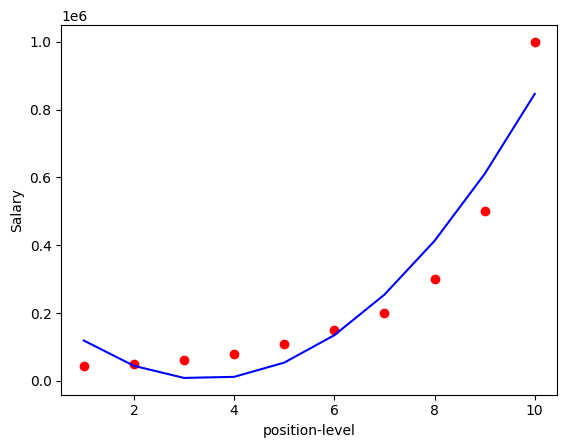

In [80]:
plt.scatter(X, y, color='r')
plt.plot(X, lin_reg_2.predict(X_poly), color='b')
plt.xlabel('position-level')
plt.ylabel('Salary')
plt.show()

by this vizualization, we get to know that polynomial regression with degree = 2 is also not a good fit for the dataset.

Lets try polynomial regression with a higher degree.

y = b0 + b1*x1 + b2(x1^2) + b3(x1^3)

y -> salaries

x1 -> position levels

In [81]:
poly_reg3 = PolynomialFeatures(degree = 3)
X_poly = poly_reg3.fit_transform(X)

lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly, y)

LinearRegression()

vizualise results for polynomial regression (degree = 3)

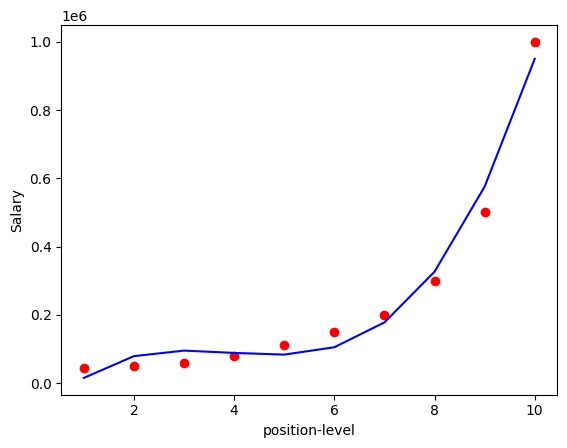

In [82]:
plt.scatter(X, y, color='r')
plt.plot(X, lin_reg_3.predict(X_poly), color='b')
plt.xlabel('position-level')
plt.ylabel('Salary')
plt.show()

Predict a new result

In [83]:
lr.predict([[6.5]])

array([330378.78787879])

In [84]:
lin_reg_3.predict(poly_reg3.fit_transform([[6.5]]))

array([133259.46969697])